Nome: DANIEL OLIVEIRA DOS SANTOS\
Matrícula: 564307\
Orientador:	JOAO PAULO DO VALE MADEIRO\
Área:	CIÊNCIA DA COMPUTAÇÃO\
Linha de Pesquisa:	TEORIA DA COMPUTAÇÃO\

In [68]:
# Bibliotecas

# cáculos e estatística
import math
from scipy.stats import norm

# tratamento de dados
import pandas as pd
import numpy as np

# Gráficos
import plotly.express as px
import matplotlib.pyplot as plt

#**Lista de exercícios**

1. Considere os dados abaixo:\
27 32 64 65 58 62 59 54 29 30 26\
48 47 46 43 38 29 32 35 37 31 43\
45 42 37 36\
Responda:\
a) quais os quartis Q1, Q2 e Q3 ? Mostre-os no boxplot.\
b) há outliers ? Se houver, quais são ?\


In [2]:
lista = [27, 32, 64, 65, 58, 62, 59, 54, 29, 30, 26, 48, 47, 46, 43, 38, 29, 32, 35, 37, 31, 43, 45, 42, 37, 36]


# função que calcula quartis

def mediana(lista):

  lista.sort() # Ordenando em ordem crescente


  total = sum(lista) # soma dos calores da lista
  quantidade = len(lista) # total de quantidade de números da lista
  resto_divisao = total % quantidade # resto da divisão


  # Calculando a mediana
  if (quantidade % 2) == 0: # para valores pares
    n = quantidade // 2  # a metade da quantidade o que fica no meio
    mediana = (lista[n] + lista[n-1]) /2 # menos 1 porque começa na posição zero e não na posição 1.
  else:
    n =  quantidade // 2
    mediana = lista[n]

  return mediana,n # retornando a mediana e a posição

def calculando_quartis(lista):
    lista.sort()  # Ordenando em ordem crescente
    quantidade = len(lista)  # quantidade de valores contados
    meio = quantidade // 2

    lista_inferior = lista[:meio]  # parte inferior da lista
    lista_superior = lista[meio:]  # parte superior da lista

    primeiro_quartis, posicao_primeiro_quartis = mediana(lista_inferior)
    segundo_quartis, posicao_segundo_quartis = mediana(lista)
    terceiro_quartis, posicao_terceiro_quartis = mediana(lista_superior)

    return primeiro_quartis, segundo_quartis, terceiro_quartis, posicao_primeiro_quartis, posicao_segundo_quartis, posicao_terceiro_quartis



primeiro_quartil,segundo_quartis, terceiro_quartil,_,_,_ = calculando_quartis(lista)
print(f"Primeiro quartil: {primeiro_quartil:.0f}, Segundo quartis: {segundo_quartis:.0f}, Terceiro quartil: {terceiro_quartil:.0f}")

Primeiro quartil: 32, Segundo quartis: 40, Terceiro quartil: 48


In [3]:
# Criando um DataFrame do Pandas
df = pd.DataFrame(lista, columns=['Dados'])

# Calculando os quartis
q1 = df['Dados'].quantile(0.25)
q2 = df['Dados'].quantile(0.50)
q3 = df['Dados'].quantile(0.75)
iqr = q3 - q1  # Amplitude interquartil..

_,_,_, posicao_primeiro_quartis, posicao_segundo_quartis, posicao_terceiro_quartis = calculando_quartis(lista)


# Definindo limites para outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr


In [4]:
# Criando o gráfico de boxplot com o Plotly Express
fig = px.box(df, y='Dados')

# Adicionando marcadores para os quartis e IQR
fig.add_annotation(x=0, y=q1, text=f'Q1: {q1}', showarrow=True, arrowhead=1, ax=-50, ay=-40)
fig.add_annotation(x=0, y=q2, text=f'Q2 (Mediana): {q2}', showarrow=True, arrowhead=1, ax=-50, ay=-40)
fig.add_annotation(x=0, y=q3, text=f'Q3: {q3}', showarrow=True, arrowhead=1, ax=-50, ay=-40)
fig.add_shape(type='line', xref='paper', yref='y', x0=0, y0=q1 - 1.5 * iqr, x1=1, y1=q1 - 1.5 * iqr, line=dict(color='black', width=1, dash='dash'))
fig.add_shape(type='line', xref='paper', yref='y', x0=0, y0=q3 + 1.5 * iqr, x1=1, y1=q3 + 1.5 * iqr, line=dict(color='black', width=1, dash='dash'))

# Atualizando layout para melhor visualização
fig.update_layout(title='Boxplot com Anotações de Quartis e IQR',
                  yaxis_title='Valores',
                  height=600,  # Altura do gráfico
                  width=800)   # Largura do gráfico)

# Mostrando o gráfico
fig.show()

In [5]:
# Criando o gráfico de outlier com o Plotly Express
fig = px.scatter(df, y='Dados')

# Adicionando marcadores para os quartis e limites
fig.add_annotation(x=posicao_primeiro_quartis, y=q1, text=f'Q1: {q1}', showarrow=True, arrowhead=1, ax=-50, ay=-40)
fig.add_annotation(x=posicao_segundo_quartis, y=q2, text=f'Q2 (Mediana): {q2}', showarrow=True, arrowhead=1, ax=-50, ay=-40)
fig.add_annotation(x=posicao_terceiro_quartis + posicao_segundo_quartis, y=q3, text=f'Q3: {q3}', showarrow=True, arrowhead=1, ax=-50, ay=-40)
fig.add_annotation(x=0, y=limite_inferior, text=f'Limite Inferior: {limite_inferior:.2f}', showarrow=True, arrowhead=1, ax=-50, ay=-40)
fig.add_annotation(x=0, y=limite_superior, text=f'Limite Superior: {limite_superior:.2f}', showarrow=True, arrowhead=1, ax=-50, ay=-40)

# Adicionando linhas para representar os limites
fig.add_shape(type='line', xref='paper', yref='y', x0=0, y0=limite_inferior, x1=1, y1=limite_inferior, line=dict(color='black', width=1, dash='dash'))
fig.add_shape(type='line', xref='paper', yref='y', x0=0, y0=limite_superior, x1=1, y1=limite_superior, line=dict(color='black', width=1, dash='dash'))

# Atualizando layout para melhor visualização
fig.update_layout(title='Gráfico de Outliers com Anotações de Quartis e Limites',
                  yaxis_title='Valores',
                  height=400,  # Altura do gráfico
                  width=1200)

# Mostrando o gráfico
fig.show()

2. Numa determinada população ficou constatado que a taxa de contágio por\
COVID-19 estava em 70% dos casos confirmados. Foram realizados testes e\
verificados acertos em 90% dos casos positivos e 60% dos casos negativos.\
Pergunta-se:\
a. Se a pessoa testou positivo, qual a probabilidade de ela ter\
COVID-19?\
b. Se a pessoa testou negativo, qual a probabilidade de ela não ter\
COVID-19?\
c. qual a probabilidade de falso-positivos e falso-negativos?

In [6]:
amostra = 0.70
positivo = 0.90
negativo = 0.60

# teorema de base


teorema_bayes_positivo = (positivo * amostra) / ((positivo * amostra) + ((1-negativo) * (1 - amostra)))
teorema_bayes_negativo = ((1-positivo) * amostra) / (((1-positivo) * amostra) + (negativo * (1-amostra)))

print(f'Se a pessoa testou positivo a probabilidade é: {teorema_bayes_positivo:.2f}')
print(f'Se a pessoa testou negativo o probabilidade é: {teorema_bayes_negativo:.2f}')

Se a pessoa testou positivo a probabilidade é: 0.84
Se a pessoa testou negativo o probabilidade é: 0.28


3. Em determinado servidor de comércio eletrônico, 5% das transações\
possuem algum problema na documentação. Se forem realizados negócios com\
20 clientes, determine a probabilidade de:\
a. exatamente 2 apresentarem problema;\
b. pelo menos 1 apresentar problema;\
c. no máximo 4 apresentarem problema.

In [7]:
# distribuição binominal


n = 20
p = 0.05
k_a = 2
k_b = 0
k_c = 4


resul = lambda n,p,k: (math.comb(n,k)) * (math.pow(p,k)) * (math.pow(1-p,n-k))

# x = pow(2,4)
#print(f'{resul * 100:.3f}%')
print(f'exatamente se 2 apresentarem problema o resultado é: {resul(n,p,k_a):.4f}')

# pelo menos um isso significa qem calcular a probabilidade de nenhum possuir problema e diminuir pela probabilidade total que pelo menos um vai ter
print(f' pelo menos se 1 apresentarem problema o resultado é: {1-resul(n,p,k_b):.4f}')


# aqui no maximo quatro isso significa a soma da probabilidade até o quarto.
print(f'no máximo se 4 apresentarem problema o resultado é: {(resul(n,p,0) + resul(n,p,1) + resul(n,p,2) + resul(n,p,3) + resul(n,p,4)):.4f}')

exatamente se 2 apresentarem problema o resultado é: 0.1887
 pelo menos se 1 apresentarem problema o resultado é: 0.6415
no máximo se 4 apresentarem problema o resultado é: 0.9974


4. As chamadas de emergência chegam a uma delegacia de polícia à razão de\
4 (quatro) por hora no período de 1 às 6 da manhã em dias úteis e podem ser\
aproximadas por uma distribuição de Poisson:\
a. quantas chamadas de emergência são esperadas num período de 30\
minutos?\
b. qual a probabilidade de nenhuma chamada num período de 30 minutos?\
c. qual a probabilidade de ao menos 2 chamadas no mesmo período?

In [8]:
# taxa_de_emergencia_por_30_min = se quatro chamadas chegam em uma hora quantos chegam em 30 minutos: chega 2 chamadas


In [9]:
# aqui vamos ultilizar a distribuição de probabilidade de poisson

# P(X = k) é a probabilidade de ocorrerem exatamente k eventos no período.
# e é a base do logaritmo natural (aproximadamente 2.71828).
# λ é a média de ocorrências do evento por período.
# k é o número de eventos que queremos calcular a probabilidade.
# k! é o fatorial de k.

q = 2
x_nenhuma_chamada = 0
x_pelos_ao_menos_duas_chamadas = 1

p = lambda q,x: math.exp(-q) * (math.pow(q,x) / math.factorial(x))
print(f'a probabilidade de nenhuma chamada num período de 30 minutos é de: {p(q,x_nenhuma_chamada)}')
print(f'a probabilidade de ao menos 2 chamadas no mesmo período é de: {p(q,x_pelos_ao_menos_duas_chamadas)}')

a probabilidade de nenhuma chamada num período de 30 minutos é de: 0.1353352832366127
a probabilidade de ao menos 2 chamadas no mesmo período é de: 0.2706705664732254


5. Helena é aluna de computação e todos os dias vai de ônibus até sua\
faculdade. Há somente um ônibus que lhe serve e ele costuma passar pelo ponto\
em qualquer instante entre 7h e 7h30, com igual probabilidade. Se num\
certo dia Helena chega ao ponto às 7h24, qual a probabilidade de ela conseguir\
pegar o ônibus ? A que hora deve chegar pra ter probabilidade de 80% de\
pegar o ônibus ?

In [10]:
# intervalo de meia hora 7 horas até 7:30 horas
intervalo_do_onibus = 30
intervalo_de_pegar_onibus = intervalo_do_onibus - 24

probabildade_de_passar = intervalo_de_pegar_onibus/intervalo_do_onibus

print(f'chega ao ponto às 7h24, qual a probabilidade de ela conseguir pegar o ônibus é de: {probabildade_de_passar*100}%')

chega ao ponto às 7h24, qual a probabilidade de ela conseguir pegar o ônibus é de: 20.0%


In [11]:
probabildade_de_passar = 80/100
intervalo_total = 30
intervalo_de_pegar_onibus = probabildade_de_passar * intervalo_do_onibus
horario = intervalo_total - intervalo_de_pegar_onibus

print(f'deve chegar pra ter probabilidade de 80% de pegar o ônibus é de: 7h: e {horario:.0f} minutos')

deve chegar pra ter probabilidade de 80% de pegar o ônibus é de: 7h: e 6 minutos


6. Suponha que, num determinado roteador, 0,01% dos pacotes que chegam\
sejam descartados. Calcule a probabilidade de que, numa amostra de 5.000\
pacotes, mais de 4 pacotes sejam descartados ? DICA: utilize a aproximação\
da binomial pela distribuição de Poisson.

In [60]:
#  probabilidade de poisson
p = lambda q,x: math.exp(-q) * (math.pow(q,x) / math.factorial(x))

a = 5000
b = 0.01/100

probabilidade_da_amostra = a * b

q = probabilidade_da_amostra
x_pacotes_descartados_0 = 0
x_pacotes_descartados_1 = 1
x_pacotes_descartados_2 = 2
x_pacotes_descartados_3 = 3
x_pacotes_descartados_4 = 4

probabilidade_de_quatro_pacotes = p(q,x_pacotes_descartados_0) + p(q,x_pacotes_descartados_1) + p(q,x_pacotes_descartados_2)+ p(q,x_pacotes_descartados_3) +p(q,x_pacotes_descartados_4)

print(f'a probabilidade de que, numa amostra de 5.000 pacotes, mais de 4 pacotes sejam descartados é de: {1 - probabilidade_de_quatro_pacotes}')

a probabilidade de que, numa amostra de 5.000 pacotes, mais de 4 pacotes sejam descartados é de: 0.00017211562995578245


7. Considere uma rede local na qual rodam duas aplicações de usuários. Uma\
das aplicações gera pequenos pacotes para a subrede de comunicação\
(tráfego interativo ou classe 1), enquanto a outra gera longos pacotes\
(tráfego proveniente de transferência de arquivos ou classe 2). A mistura do\
tráfego na subrede de comunicação é 2/3 e 1/3 de tráfego classe 1 e 2\
respectivamente. Examinando o tráfego na rede, verificou-se que, de todos os\
pacotes de classe 1 enviados na rede, 10% são destinados ao (único) servidor\
de arquivos e 60% no caso da classe 2. Dado que chega um pacote ao servidor\
de arquivo, qual a probabilidade de ele ser da classe 2 ?

In [56]:
# aqui vamos usar o teorema de bayes

# P(A|B) é a probabilidade do evento A ocorrer dado que o evento B ocorreu.
# P(B|A) é a probabilidade do evento B ocorrer dado que o evento A ocorreu.
# P(A) é a probabilidade do evento A ocorrer.
# P(B) é a probabilidade do evento B ocorrer.

a =  2/3
ab = 0.1
b = 1/3
ba = 0.6
x = (b*ba) / ((a* ab) + (b*ba))
# ab = 0.4886
print(f'probabilidade de ele ser da classe 2 é de: {x}%')


probabilidade de ele ser da classe 2 é de: 0.75%


8. Suponha que os registros históricos mostram que 30% de uma população é\
imune a uma determinada doença de inverno. Se uma amostra probabilística de\
DEZ pessoas é retirada dessa população, qual a probabilidade de ter\
exatamente QUATRO pessoas imunes ?

In [14]:
# aqui vamos usar distribuição binominal

# O número de tentativas ou experimentos, geralmente representado por "n".
# A probabilidade de sucesso em cada tentativa, geralmente representada por "p".
# O número de sucessos desejados, geralmente representado por "k".


n = 10
p = 0.30
k_a = 4
#k_b = 7

resul_a = (math.comb(n,k_a)) * (math.pow(p,k_a)) * (math.pow(1-p,n-k_a))
#resul_b = (math.comb(n,k_b)) * (math.pow(p,k_b)) * (math.pow(1-p,n-k_b))

print(f'resultado de A: {resul_a:.4f}%')
#print(f'resultado de B: {resul_b * 100:.3f}%')

resultado de A: 0.2001%


9. Observe a função de distribuição acumulada (cdf) F(x) abaixo:

a. mostre seu gráfico\
b. calcule P(X >= 9) e P(X <= 4)\
c. calcule sua função de densidade (pdf) f(x) correspondente

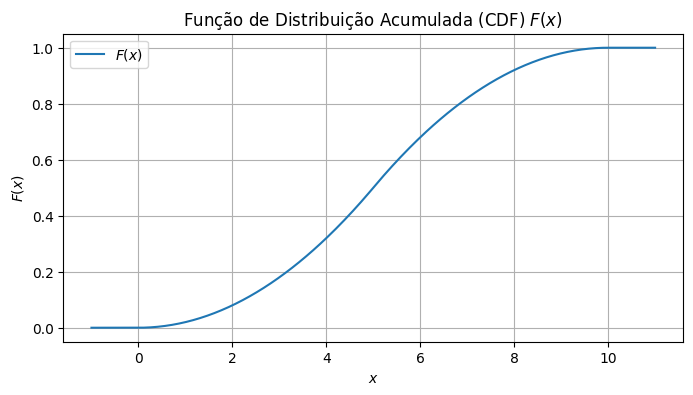



Resultado P(X >= 9) = 0.0200
Resultado P(X <= 4) = 0.3200


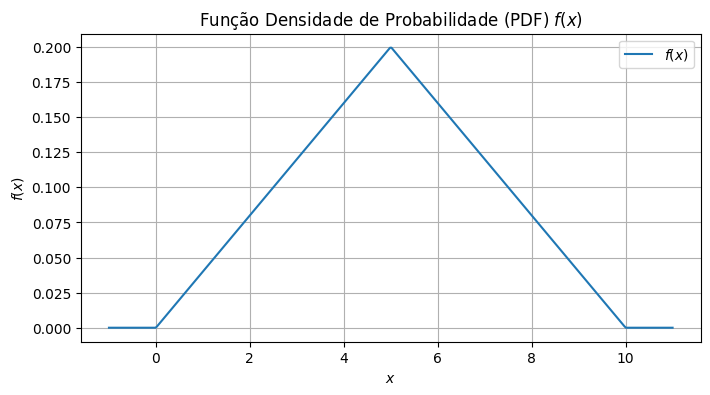

In [67]:
# Definindo a função F(x)
def F(x):
    if x < 0:
        return 0
    elif 0 <= x <= 5:
        return x**2 / 50
    elif 5 < x <= 10:
        return -x**2 / 50 + (2/5)*x - 1
    else:
        return 1

# Criando um array de valores x
x_values = np.linspace(-1, 11, 400)
# Calculando os valores de F(x)
F_values = np.array([F(x) for x in x_values])

# Plotando o gráfico
plt.figure(figsize=(8, 4))
plt.plot(x_values, F_values, label='$F(x)$')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.title('Função de Distribuição Acumulada (CDF) $F(x)$')
plt.legend()
plt.grid(True)
plt.show()


# Calculando F(9) e F(4)
F_9 = F(9)
F_4 = F(4)

# P(X >= 9) = 1 - F(9)
P_geq_9 = 1 - F_9
# P(X <= 4) = F(4)
P_leq_4 = F_4

print('\n')
print(f'Resultado P(X >= 9) = {P_geq_9:.4f}')
print(f'Resultado P(X <= 4) = {P_leq_4:.4f}')


# Definindo a função f(x)
def f(x):
    if x < 0:
        return 0
    elif 0 <= x <= 5:
        return x / 25
    elif 5 < x <= 10:
        return -x / 25 + 2 / 5
    else:
        return 0

# Calculando os valores de f(x)
f_values = np.array([f(x) for x in x_values])

# Plotando o gráfico
plt.figure(figsize=(8, 4))
plt.plot(x_values, f_values, label='$f(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Função Densidade de Probabilidade (PDF) $f(x)$')
plt.legend()
plt.grid(True)
plt.show()


10. Os salários dos operários de uma empresa têm distribuição normal em\
torno da média de 1.500 com desvio padrão de 200 Qual a\
probabilidade de um funcionário escolhido aleatoriamente:\
a. ganhar 1.400\
b. ganhar acima de 1.650\
c. ganhar abaixo de 1.400\
d. ganhar acima de 2.500\
e. ganhar entre 1.400 e R$ 1.650\
f. ganhar acima de 10.000

In [46]:
media = 1500
desvio_padrao = 200

#coeficiente = (media/desvio_padrao)*100
#coeficiente

z = lambda x,u,q: (x-u)/q

# densidade de probabilidade
densidade = lambda x: np.exp(-np.power(x,2)/2)/ np.sqrt(2*np.pi)

# função de distribuição acumulada
fda = lambda x: norm.cdf(x)

In [55]:
print('probabilidade de um funcionário escolhido aleatoriamente')
print(f'ganhar 1.400 é de: {densidade(z(1400,media,desvio_padrao)):.4f}')
print(f'ganhar acima de 1.650 é de: {1 - fda(z(1650,media,desvio_padrao)):.4f}')
print(f'ganhar abaixo de 1.400 é de: {fda(z(1400,media,desvio_padrao)):.4f}')
print(f'ganhar acima de 2.500 é de: {1-fda(z(2500,media,desvio_padrao)):.4f}')
print(f'ganhar entre 1.400 e R$ 1.650 é de: {fda(z(1650,media,desvio_padrao)) - fda(z(1400,media,desvio_padrao)):.4f}')
print(f'ganhar acima de 10.000 é de: {1-fda(z(10000,media,desvio_padrao)):.4f}')

probabilidade de um funcionário escolhido aleatoriamente
ganhar 1.400 é de: 0.3521
ganhar acima de 1.650 é de: 0.2266
ganhar abaixo de 1.400 é de: 0.3085
ganhar acima de 2.500 é de: 0.0000
ganhar entre 1.400 e R$ 1.650 é de: 0.4648
ganhar acima de 10.000 é de: 0.0000
